In [330]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

from typing import Callable

not_quite_zero = sys.float_info.epsilon


# Graph Complexities

## Graphing Function

In [331]:
def graph_function(
    func: Callable[[int], int], title: str, start=not_quite_zero, stop=1000
) -> None:
    x = np.linspace(start, stop)
    y = np.array([func(xi) for xi in x])

    plt.semilogy(x, y, label=title)


## Complexities to Graph

In [332]:
def ta_n(n: int):
    return 1000 * n


def tb_n(n: int):
    return 200 * (n * math.log(n))


def tc_n(n: int):
    return 10 * math.pow(n, 2)


def td_n(n: int):
    return math.pow(2, n)


## Result

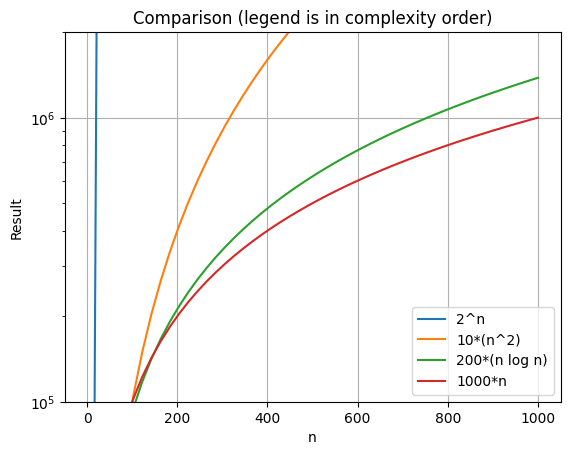

In [333]:
functions = [
    [td_n, "2^n"],
    [tc_n, "10*(n^2)"],
    [tb_n, "200*(n log n)"],
    [ta_n, "1000*n"],
]

for fn in functions:
    graph_function(fn[0], fn[1])
plt.xlabel("n")
plt.ylabel("Result")
plt.title("Comparison (legend is in complexity order)")
plt.legend()
plt.ylim(10**5, 2000000)

plt.grid(True)
plt.show()


# Ranking complexities

* n log n
* 2^n
* n!
* (n^2)/2
* n^2 + log n 
* n^2 log n
* n + n^7 + n^3
* sqrt(n)
* (3/2)^n
* e^n

## Procedure

1. Recognize the general type of growth of each function. 

| Complexity | Growth Type |
| ---------- | ----------- |
| * n log n  | Logarithmic |
| * 2^n | exponential |
| * n! | Factorial |
| * (n^2)/2 | polinomial |
| * n^2 + log n  | polinomial since the most dominant expression is n^2 |
| * n^2 log n | quasi-polinomial or intermediate complexity. Slower than quadratic, because log n slows it down. |
| * n + n^7 + n^3 | n^7 is polinomial so polinomial |
| * sqrt(n) | square root growth |
| * (3/2)^n | exponential |
| * e^n | polinomial |



| Complexity | Growth Type |
| ---------- | ----------- |
| Factorial  | n! |
| Exponential| 2^n,  (3/2)^n, e^n |
| Polinomial | n^2 + log n, n + n^7 + n^3, n^2/2, n^2 log n | 
| Logarithmic| n log n,    |
| Square root growth | sqrt(n) |



2. Recognize which growth types grow faster when n tends to infinity.

    1. Factorial (n!)
    2. Exponential (2^n, (3/2)^n, e^n)
    3. Polynomial (n^2 + log n, n^2 log n, n^2/2, n + n^7 + n^3)
    4. Logarithmic (n log n)
    5. Square root (sqrt(n))

    So far the list is as follows:

    1. n!

    1,2,3. (2^n, (3/2)^n, e^n)


    5,6,7,8. (n^2 + log n, n^2 log n, n^2/2, n + n^7 + n^3)

    9. n log n

    10. sqrt(n)


3. Determinate ranking among the exponentials growth complexities            

    1. Recognize that all of the terms have the same exponent (x^n)
    2. With the exponents been the same, the highest base has the highest growth:
        1. e^n (e is aprox 2.7)
        2. 2^n
        3. (3/2)^n (1.5)

4. Determinate ranking amoung the polynomial




    1. Determinate the degree of the polynomial. The higher the degree the higher the complexity. 

        a. n^2 + log n has a degree of 2 (The + log n can be discarded)

        b. n + n^7 + n^3 has a degree of 7.

        c. n^2/2  has a degree of 2

        d. n^2 log n  has a degree of 2

    2. Determinate the growth rate amongs same degree polynomial based on the coefficient.

        (log n) > (1) > (1/2)

        As n grows larger, log n becomes bigger than 1, and 1 is always bigger than 0.5

## Result


1. n!
3. e^n
2. 2^n
4. (3/2)^n
5. n + n^7 + n^3
6. n^2 log n
7. n^2 + log n
8. n^2/2
9. n log n
10. sqrt(n)

## Testing

In [334]:
def two_to_the_power_of_n(n):
    return 2**n


def three_halves_to_the_power_of_n(n):
    return (3 / 2) ** n


def e_to_the_power_of_n(n):
    return math.exp(n)


def factorial(n):
    return math.factorial(n)


def n_plus_n7_plus_n3(n):
    return n + n**7 + n**3


def n_squared_log_n(n):
    return n**2 * math.log(n)


def n_squared_plus_log_n(n):
    return n**2 + math.log(n)


def n_squared_divided_by_2(n):
    return (n**2) / 2


def n_log_n(n):
    return n * math.log(n)


def square_root_of_n(n):
    return math.sqrt(n)


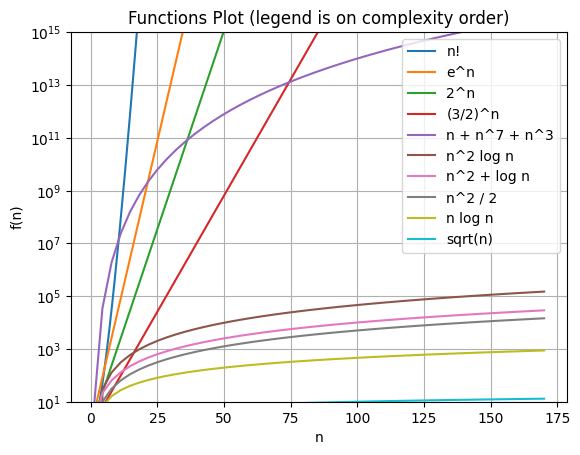

In [335]:
def plot_n_factorial(testing_range):
    x = list(range(1, testing_range + 1))
    y = [math.factorial(i) for i in x]
    plt.plot(x, y, label="n!")


complexity_functions_p1 = [
    [e_to_the_power_of_n, "e^n"],
    [two_to_the_power_of_n, "2^n"],
    [three_halves_to_the_power_of_n, "(3/2)^n"],
    # [factorial, "n!"],
]
complexity_functions_p2 = [
    [n_plus_n7_plus_n3, "n + n^7 + n^3"],
    [n_squared_log_n, "n^2 log n"],
    [n_squared_plus_log_n, "n^2 + log n"],
    [n_squared_divided_by_2, "n^2 / 2"],
    [n_log_n, "n log n"],
    [square_root_of_n, "sqrt(n)"],
]
testing_range = 170
plot_n_factorial(testing_range)
for fn in complexity_functions_p1:
    graph_function(fn[0], fn[1], start=1, stop=testing_range)
# factorial

for fn in complexity_functions_p2:
    graph_function(fn[0], fn[1], start=1, stop=testing_range)

plt.legend()
plt.xlabel("n")
plt.ylabel("f(n)")
plt.title("Functions Plot (legend is on complexity order)")
plt.ylim(10**1, 1000000000000000)
plt.grid(True)
plt.show()
